938/938 ━━━━━━━━━━━━━━━━━━━━ 297s 314ms/step - accuracy: 0.8954 - loss: 0.3336 - val_accuracy: 0.9895 - val_loss: 0.0336
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9872 - loss: 0.0408
Test accuracy: 0.9895


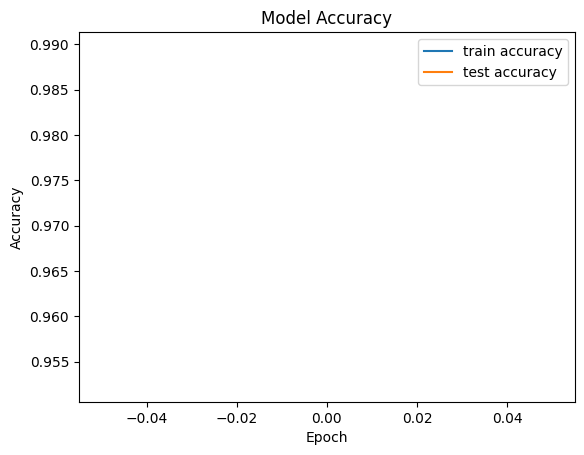

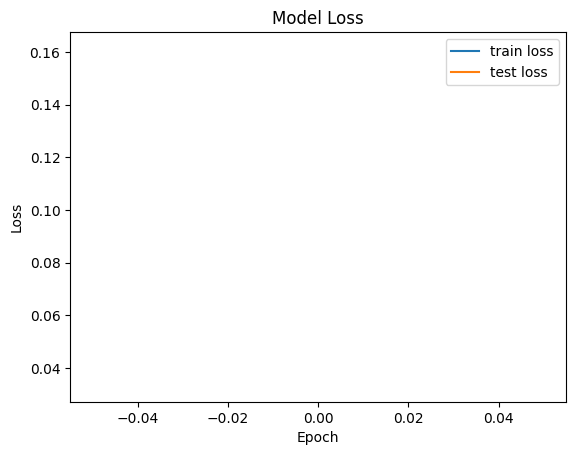

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255  # Reshape and normalize
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the CNN model
def create_cnn_model():
    model = models.Sequential()

    # Convolutional layer with 3x3 filters (Sharpening Filter)
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # Convolutional layer with 5x5 filters (Blur Filter)
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))

    # Pooling layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Another convolutional layer (Edge Detection Filter)
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # Flattening layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout for regularization
    model.add(layers.Dense(10, activation='softmax'))  # Output layer

    return model

# Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()